Para resolução do trabalho, foi escolhida a mistura água e acetona, a equação de estado SRK e o modelo NRTL para o cálculo da energia de Gibbs de excesso. Esse arquivo foca na primeira questão da primeira parte do trabalho, que visa o uso da equação de estado para os cálculos com componentes puros.

I)	Equilíbrio líquido-vapor:

a.	Cálculo da pressão de saturação dos dois componentes puros da mistura água e acetona.

b.	Comparação entre os valores obtidos pela equação de estado e pela equação de Antoine.

c.	Comparação entre os valores obtidos e dados experimentais.

In [1]:
import numpy as np
import numpy.matlib as npmatlib
import scipy as sci
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy import optimize as optimize

# I) Equilíbrio Líquido Vapor
## a) Cálculo da Pressão de Saturação para os componentes puros: acetona e água

### Equação de Estado Soave-Redlich-Kwong (1972)
A equação SRK foi retirada da Apostila de Termodinâmica da Engenharia Química - EQE359 (Tavares, Medeiros e Segtovich).

$${P} = \frac{RT}{\bar{V}-b} - \frac{a(T)}{(\bar{V}+\varepsilon.b)(\bar{V}+\sigma.b)} $$

Para SRK, os coeficientes tem os seguintes valores:
- $\sigma = 1$;
- $\varepsilon = 0$;
- $\Omega = 0,08664$;
- $\Psi = 0,42748$

Portanto, a equação pode ser simplificada, substituindo-se $\varepsilon$ e $\sigma$:

$${P} = \frac{RT}{\bar{V}-b} - \frac{a(T)}{\bar{V}(\bar{V}+b)} $$

${a(T)} = {a} = \Psi\frac{\alpha(Tr)R^2Tc^2}{Pc}$, no código: a(T) será chamado de a

${b} = \Omega\frac{RTc}{Pc}$

${\alpha(Tr)} = alfaSRK = [1+(0,480+1,574w-0,176w^2)(1-Tr^\frac{1}{2})]^2$, no código: alfa(Tr) será chamado alfa

${Tr} = \frac{T}{Tc}$

onde o w é o fator acêntrico. Os valores de $\sigma$, $\varepsilon$, $\Omega$ e $\Psi$ utilizados foram obtidos na Tabela 3.1 da referida apostila. Os valores de Pc e Tc e de R para acetona e água foram obtidos nos apêndices B e A, respectivamente, no livro de Van Ness.

### Constantes a serem usadas:

In [3]:
#Valor para a constante universal dos gases - Van Ness, Tabela A.2, pag. 506
R = 8.3144598 #J.mol^-1.K^-1

#Valores para acetona pura: Tc, Pc e w - Van Ness, Tabela B.1, pag. 508
Tc_ac = 508.2 #K
Pc_ac = 47.01*10**5 #Pa
w_ac = 0.307

#Valores para água pura: Tc, Pc e w - Van Ness, Tabela B.1, pag. 509.
#O índice "wat" foi escolhido para evitar confusão com o índice "ac".
Tc_wat = 647.1 #K
Pc_wat = 220.55*10**5 #Pa
w_wat = 0.345

#Valores das constantes da equação SRK - Tabela 3.1, pag. 37.
sigma = 1
omega = 0.08664
psi = 0.42748
ep = 0

#A Temperatura de ebulição a 1 bar da acetona é 56,1 ºC
#Referência: GESTIS Substance Database. 
P_ac = 1*10**5 #Pa
T_ac = 56+273.15 #K

#A Temperatura de ebulição a 1 atm da água é aproximadamente 100,0 ºC.
P_wat = 1*10**5 #Pa
T_wat = 100+273.15 #K

### Cálculo dos volumes de líquido e vapor a uma dada pressão:

É preciso isolar o volume e igualar a equação a zero, de forma a usar o numpy.roots e calcular o que é necessário a partir dos coeficientes da equação.

$${P}{\bar{V}^{3}}+[({\sigma}-1).{P}.{b}-{R}.{T}]{\bar{V}^{2}}-[{\sigma}.{P}.{b}^{2}+({\sigma}.{R}.{T}.{b})-{a}]{\bar{V}}-[{a}.{b}] = 0$$

Como $\sigma = 1$:
$${P}{\bar{V}^{3}}-({R}.{T}){\bar{V}^{2}}-[{P}.{b}^{2}+({R}.{T}.{b})-{a}]{\bar{V}}-[{a}.{b}] = 0$$

${c3} = {P}$

${c2} = -{R}.{T}$

${c1} = {a}-{P}.{b}^{2}-({R}.{T}.{b})$

${c0} = -({a}.{b})$

A menor raiz será a de líquido, enquanto a maior será de gás.

In [4]:
def polysolverfilter(coefs,b):
    ans = np.roots(coefs)
    ans = ans[np.where(ans>b)]
    return ans

#Essa função filtra o resultado dos polinômios calculados em V, de forma que valores não reais de V fiquem de fora
#da resposta, evitando resultados não coerentes.

In [5]:
def V_EOS (T,P,Tc,Pc,w):  
    b = omega*R*Tc/Pc
    Tr = T/Tc
    alfa = (1+(0.48+(1.574*w)-(0.176*(w**2)))*(1-(Tr**(1/2))))**2
    a = psi*(alfa*(R**2)*(Tc**2)/Pc)
    c3 = P
    c2 = -(R*T)
    c1 = (a)-(P*(b**2))-(R*T*b)
    c0 = -(a*b)
    V = np.roots([c3,c2,c1,c0])
    
    return V

#TESTE DA FUNÇÃO:
V_ac = V_EOS(T_ac,P_ac,Tc_ac,Pc_ac,w_ac)
Vl_ac = min(V_ac)
Vv_ac = max(V_ac)
print("- Acetona:")
print("Volume de líquido de acetona = ",Vl_ac,)
print("Volume de vapor de acetona = ",Vv_ac,)    
print(" ")
V_wat = V_EOS(T_wat,P_wat,Tc_wat,Pc_wat,w_wat)
Vl_wat = min(V_wat)
Vv_wat = max(V_wat)
print("- Água:")
print("Volume de líquido de água = ",Vl_wat,)
print("Volume de vapor de águaa = ",Vv_wat,)   

- Acetona:
Volume de líquido de acetona =  9.88292496993e-05
Volume de vapor de acetona =  0.0265929160556
 
- Água:
Volume de líquido de água =  2.53706913208e-05
Volume de vapor de águaa =  0.0307660095935


### Cálculo da Energia de Gibbs Residual

O cálculo da energia de Gibbs residual e dos coeficientes de fugacidade ($\phi$) permitem o cálculo da pressão de saturação posteriormente. 

$${\bar{G}^{R}} = R.T.[Z-1-ln(Z-B)-(\frac{A}{B}).ln(\frac{Z+B}{Z})]$$

Substituindo 

${Z} = \frac{P.\bar{V}}{R.T}$

${B} = \frac{P.b}{R.T}$

${A} = \frac{P.a}{R^2.T^.2}$

Obtem-se a equação que será usada para o cálculo da energia de Gibbs residual para líquido e vapor e de sua variação:

$${\bar{G}^{R}} = R.T.\left[\frac{P.\bar{V}}{R.T}-1-ln\left(\frac{P.\bar{V}}{R.T}-\frac{P.b}{R.T}\right)-\left(\frac{a}{b.R.T}\right).ln\left(\frac{\frac{P.\bar{V}}{R.T}+\frac{P.b}{R.T}}{\frac{P.\bar{V}}{R.T}}\right)\right]$$

Em um equilíbrio líquido e vapor é importante notar que:

$${\phi_i}^{L} = {\phi_i}^{V}$$

Como trata-se do equilíbrio líquido-vapor em um substância pura e utiliza-se equação de estado para o cálculo do G:

${\phi_i} = exp [\frac{\bar{G^R}}{RT}]$

E, pode-se afirmar que:

$$ {\bar{G}^{RL}} = {\bar{G}^{RV}}$$

$$ {RESÍDUO} = {\Delta\bar{G}^{R}}={\bar{G}^{RL}} - {\bar{G}^{RV}} = 0$$

A pressão de saturação é a pressão que resolve a igualdade de fugacidades na fase líquida e vapor. Portanto, o delta G será usado como função resíduo para determinação da pressão de saturação.

### Cálculo de Pressão de saturação:

$${P} = \frac{RT}{\bar{V}-b} - \frac{a}{\bar{V}(\bar{V}+b)} = \frac{RT}{\bar{V}-b} - {a)}.\left[\left(\frac{\frac{1}{b}}{\bar{V}}\right)-\left(\frac{\frac{1}{b}}{(\bar{V}+b)}\right)\right]$$

Para determinar a pressão de saturação, será usado o método da bissetriz. Portanto, é preciso achar os valores máximo e mínimo para se montar o intervalo de pressão, a partir da equação SRK. Dessa forma, é preciso derivar a pressão em a função do volume a temperatura constante.

$\left(\frac{\partial P}{ \partial \bar{V}}\right)_{T}= -\frac{RT}{(\bar{V}-{b})^2}+\left[\frac{2a(\bar{V}+{\frac{b}{2}})}{\bar{V^2}({\bar{V+b})^2}}\right]=0$

$-RT\bar{V}^4+(2a-2bRT).\bar{V}^3-(RTb^2+3ab).\bar{V}^2+ab^3=0$

A equação acima será usada para determinar os limites inferior e superior da pressão, para construção do gráfico.

#### 1) Função G_res:

In [6]:
def G_res(T,P,V,Tc,Pc,w):    
    b = omega*R*Tc/Pc
    Tr = T/Tc
    alfa = (1+(0.48+(1.574*w)-(0.176*(w**2)))*(1-(Tr**(1/2))))**2
    a = psi*(alfa*(R**2)*(Tc**2)/Pc)
    G_res = R*T*(((P*V)/(R*T))-1-np.log(((P*V)/(R*T))-(b*P)/(R*T))-(a/(b*R*T))*np.log((((P*V)/(R*T))+ (b*P)/(R*T))/((P*V)/(R*T))))
    return G_res

#TESTE PARA GIBBS:
Gl_res_ac = G_res (T_ac,P_ac,Vl_ac,Tc_ac,Pc_ac,w_ac)
Gv_res_ac = G_res (T_ac,P_ac,Vv_ac,Tc_ac,Pc_ac,w_ac)
Gl_res_wat = G_res (T_wat,P_wat,Vl_wat,Tc_wat,Pc_wat,w_wat)
Gv_res_wat = G_res (T_wat,P_wat,Vv_wat,Tc_wat,Pc_wat,w_wat)

print("- Acetona:")
print("Gibbs residual da fase líquida para acetona = ",Gl_res_ac, 'J/mol')
print("Gibbs residual da fase vapor para acetona = ",Gv_res_ac,'J/mol')
print(" ")
print("- Água:")
print("Gibbs residual da fase líquida para água = ",Gl_res_wat,'J/mol')
print("Gibbs residual da fase vapor para água = ",Gv_res_wat,'J/mol')

- Acetona:
Gibbs residual da fase líquida para acetona =  -97.2618424192 J/mol
Gibbs residual da fase vapor para acetona =  -76.4336334977 J/mol
 
- Água:
Gibbs residual da fase líquida para água =  -270.085459562 J/mol
Gibbs residual da fase vapor para água =  -25.8410416865 J/mol


#### 2) Função $\Delta_{Gres}$:

In [7]:
#Critério de equilíbrio Gl_res = Gv_res :. delta_G_res = 0 :.
#delta_G_res < tolerância

def delta_G_res(T,P,Pc,Tc,w):
    b = omega*R*Tc/Pc
    Tr = T/Tc
    alfa = (1+(0.48+(1.574*w)-(0.176*(w**2)))*(1-(Tr**(1/2))))**2
    a = psi*(alfa*(R**2)*(Tc**2)/Pc)
    
    V = V_EOS(T,P,Tc,Pc,w)    
    Vl = min(V) 
    Vv = max(V)
   
    Gl_res = G_res(T,P,Vl,Tc,Pc,w)
    Gv_res = G_res(T,P,Vv,Tc,Pc,w)
    delta_G_res = Gl_res - Gv_res
    
    return delta_G_res

#TESTE DO DELTA G:
delta_G_res_ac = delta_G_res(T_ac,P_ac,Pc_ac,Tc_ac,w_ac)
delta_G_res_wat = delta_G_res(T_wat,P_wat,Pc_wat,Tc_wat,w_wat)

print("Delta G residual acetona: ",delta_G_res_ac,'J/mol')
print("Delta G residual água: ",delta_G_res_wat,'J/mol')

Delta G residual acetona:  -20.8282089215 J/mol
Delta G residual água:  -244.244417875 J/mol


#### 3) Função para cálculo dos limites de P:

In [8]:
#cálculo de cada coeficiente na expressão, igualando dP/dV a 0
def Plimites(T,Pc,Tc,w):
    b = omega*R*Tc/Pc
    Tr = T/Tc
    alfa = (1+(0.48+(1.574*w)-(0.176*(w**2)))*(1-(Tr**(1/2))))**2
    a = psi*(alfa*(R**2)*(Tc**2)/Pc)
    
    A = (R*T)
    B = -(2*a-(2*b*R*T))
    C = ((R*T*(b**2))+(3*a*b))
    D = 0
    E = -(a*(b**3))
    limites = np.roots([A,B,C,D,E])
    limites = limites[np.where( limites > b)] #Se V < b :. valores negativos ou não reais para P
#Serão achados os volumes e esses darão a pressão máxima (P_sup_limite) e mínima (P_min_limite)
#Podem haver valores de plateau não físicos, então é preciso retirá-los com uma função "where"
    
    Vinfi = min(limites)
    Vsupi = max(limites)
    Psup = (R*T/(Vsupi-b))-a/(Vsupi*(Vsupi-b))
    Psupi=Psup*.999 #para a nova pressão a ser analisada
    
    Pinf = (R*T/(Vinfi-b))-a/(Vinfi*(Vinfi-b))
#A pressão ser negativa ou igual a zero não pode, então, é preciso colocar um comando "if" com uma correção
    if Pinf > 0:
        Pinfi = Pinf*1.001
    else:
        Pinfi = 0.000000001
    return [Vinfi, Vsupi, Pinfi, Psupi]

#TESTE PARA o Plimites
[Vinfi_ac,Vsupi_ac,Pinfi_ac,Psupi_ac]=Plimites(T_ac,Pc_ac,Tc_ac,w_ac)
[Vinfi_wat,Vsupi_wat,Pinfi_wat,Psupi_wat]=Plimites(T_wat,Pc_wat,Tc_wat,w_wat)
print("- Acetona:")
print("Vinfi acetona:", Vinfi_ac)
print("Vsupi acetona:", Vsupi_ac)
print("Pinfi acetona:", Pinfi_ac)
print("Psupi acetona:", Psupi_ac)
print(" ")
print("- Água:")
print("Vinfi água:", Vinfi_wat)
print("Vsupi água:", Vsupi_wat)
print("Pinfi água:", Pinfi_wat)
print("Psupi água:", Psupi_wat)

- Acetona:
Vinfi acetona: 0.000127710866838
Vsupi acetona: 0.00136271767564
Pinfi acetona: 1e-09
Psupi acetona: 827511.310692
 
- Água:
Vinfi água: 3.23069255616e-05
Vsupi água: 0.000476919630992
Pinfi água: 1e-09
Psupi água: 2828202.28114


#### 3) Cálculo da Pressão de Saturação pelo Método da Bissetriz

In [9]:
#O método da bissetriz é função de uma variável. Portanto, as variáveis da função delta_G_res tem que ser definidas,
#menos o P que será determinado pelo método.

def delta_G_res_bis_ac(P):
    return delta_G_res(T_ac,P,Pc_ac,Tc_ac,w_ac)

def delta_G_res_bis_wat(P):
    return delta_G_res(T_wat,P,Pc_wat,Tc_wat,w_wat)

print(delta_G_res_bis_ac(P_ac))
print(delta_G_res_bis_wat(P_wat))

-20.8282089215
-244.244417875


In [10]:
#TESTE para Psat:
Psat_ac = optimize.bisect(delta_G_res_bis_ac, Pinfi_ac, Psupi_ac, xtol=1.0e-9, rtol=1.0e-9, maxiter=100, full_output=True, disp=True)
print("Pressão de Saturação da acetona = [",str (Psat_ac[0]),"] Pa")

Psat_wat = optimize.bisect(delta_G_res_bis_wat, Pinfi_wat, Psupi_wat, xtol=1.0e-9, rtol=1.0e-9, maxiter=100, full_output=True, disp=True)
print("Pressão de Saturação da água = [",str (Psat_wat[0]),"] Pa")

Pressão de Saturação da acetona = [ 99217.03949626946 ] Pa
Pressão de Saturação da água = [ 92364.76448057179 ] Pa


In [11]:
#TESTE
print("- Acetona:")
print(Psat_ac[1])
print("")
print("- Água:")
print(Psat_wat[1])

- Acetona:
      converged: True
           flag: 'converged'
 function_calls: 35
     iterations: 33
           root: 99217.03949626946

- Água:
      converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: 92364.76448057179


#### 4) Pressões de saturação da água e acetona:

In [21]:
def calc_Psat(T_in,Pc,Tc,w):
    Tdado = T_in
    
    def delta_G_res_Tdado(P):
        return delta_G_res(Tdado,P,Pc,Tc,w)
    
    [_,_,Pinfi,Psupi] = Plimites(Tdado,Pc,Tc,w)
    Pans = optimize.bisect(delta_G_res_Tdado, Pinfi, Psupi*5, xtol=1.0e-9, rtol=1.0e-9, maxiter=100, full_output=False, disp=True)
       
    return Pans, Pinfi, Psupi

calc_Psat_ac = calc_Psat(T_ac,Pc_ac,Tc_ac,w_ac)[0]
calc_Psat_wat = calc_Psat(T_wat,Pc_wat,Tc_wat,w_wat)[0]

print("Psat da acetona:",calc_Psat_ac," Pa (329,15 K)")
print("Psat da água:",calc_Psat_wat," Pa (373,15 K)")
print(" ")
print("Psat da acetona:",calc_Psat_ac*10**(-5)," bar (329,15 K)")
print("Psat da água:",calc_Psat_wat*10**(-5)," bar (373,15 K)")

Psat da acetona: 99217.03955647894  Pa (329,15 K)
Psat da água: 92364.76436739347  Pa (373,15 K)
 
Psat da acetona: 0.9921703955647895  bar (329,15 K)
Psat da água: 0.9236476436739347  bar (373,15 K)


C:\Users\Fabiana Coelho\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:249: ComplexWarning: Casting complex values to real discards the imaginary part
  r = _zeros._bisect(f,a,b,xtol,rtol,maxiter,args,full_output,disp)


### Comparação dos dados:
5.1) Montagem do gráfico de Pressão de saturação por temperatura para acetona.

5.2) Plotar os dados experimentais encontrados no banco de dados da Dortmund Data Bank (DDBST).

5.3) Plotar ainda a pressão de acordo com a Equação de Antoine, através dos coeficientes disponíveis na DDBST.

### Equação de Antoine 
A equação de Antoine foi retirada da Apostila de Termodinâmica da Engenharia Química - EQE359 (Tavares, Medeiros e Segtovich).

$$ln{P_{sat}} = A - \frac{B}{T+C}$$

Os coeficientes A, B e C e suas relações com a temperatura estão dentro do código de Antoine para cada cálculo.



### Acetona!

In [22]:
T=200
Taxis=np.linspace(T,Tc_ac*0.9,100) #Seleção dos valores de T
Paxis=np.zeros(100)  #Criação de um vetor de zeros para P
Paxis[0]=calc_Psat(Taxis[0],Pc_ac,Tc_ac,w_ac)[0]  #Cálculo da Psat

for i in range(100):
    Paxis[i]=calc_Psat(Taxis[i],Pc_ac,Tc_ac,w_ac)[0]

C:\Users\Fabiana Coelho\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:249: ComplexWarning: Casting complex values to real discards the imaginary part
  r = _zeros._bisect(f,a,b,xtol,rtol,maxiter,args,full_output,disp)


In [25]:
#Dados retirados da Tabela B.2 do Van Ness.
def Pantoine_acetona(T):
    A = 14.3145
    B = 2756.22
    C = 228.06
    return (np.exp(A - B/(T-273 + C)))*1000
#Temperaturas entre -26ºC e 77ºC.

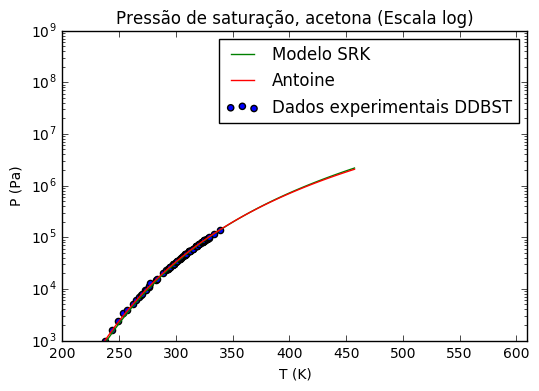

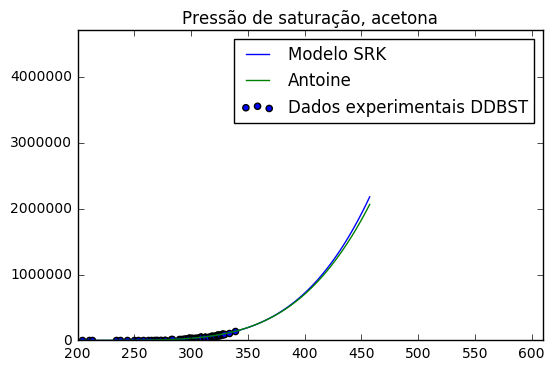

In [26]:
dadosexp = np.loadtxt('exp data vapor pressure acetone.txt', dtype='float', comments='#', converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
T_exp = dadosexp[:,0]
P_exp = dadosexp[:,1]*1000

plt.figure(1)

legend=[]
plt.title('Pressão de saturação, acetona (Escala log)')
plt.semilogy(1)
plt.scatter(T_exp,P_exp, label='Dados experimentais DDBST')
plt.plot(Taxis,Paxis, label='Modelo SRK')

plt.xlabel('T (K)')
plt.ylabel('P (Pa)')
plt.xlim([200,Tc_ac*1.2]) 
plt.ylim([1e3,1e9]) 
      
Pantoine_acetonaaxis = [ Pantoine_acetona(Taxis[i]) for i in range(100) ]
plt.plot(Taxis,Pantoine_acetonaaxis, label='Antoine')
plt.legend(loc=0)

plt.figure(2)

legend=[]
plt.title('Pressão de saturação, acetona')
plt.scatter(T_exp,P_exp, label='Dados experimentais DDBST')
plt.plot(Taxis,Paxis, label='Modelo SRK')

plt.xlim([200,Tc_ac*1.2]) 
plt.ylim([0,Pc_ac]) 
      
Pantoine_acetonaaxis = [ Pantoine_acetona(Taxis[i]) for i in range(100) ]
plt.plot(Taxis,Pantoine_acetonaaxis, label='Antoine')
plt.legend(loc=0)

plt.show()

### Água!

In [16]:
T=200
Taxis=np.linspace(T,Tc_wat,100) 
Paxis=np.zeros(100)
Paxis[0]=calc_Psat(Taxis[0],Pc_wat,Tc_wat,w_wat)[0]

for i in range(100):
    Paxis[i]=calc_Psat(Taxis[i],Pc_wat,Tc_wat,w_wat)[0]

C:\Users\Fabiana Coelho\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:249: ComplexWarning: Casting complex values to real discards the imaginary part
  r = _zeros._bisect(f,a,b,xtol,rtol,maxiter,args,full_output,disp)


ValueError: f(a) and f(b) must have different signs

In [17]:
#Dados retirados da Tabela B.2 do Van Ness.
def Pantoine_agua(T): 
    A = 16.3872
    B = 3885.70
    C = 230.170
    return (np.exp(A - B/(T-273 + C)))*1000

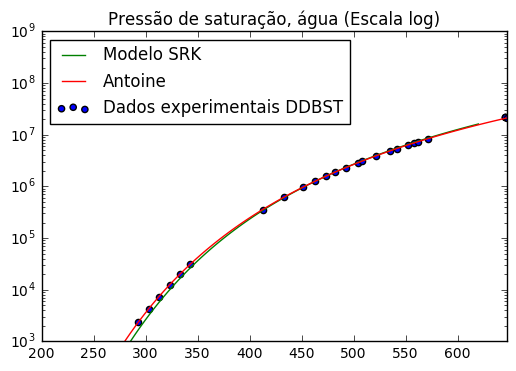

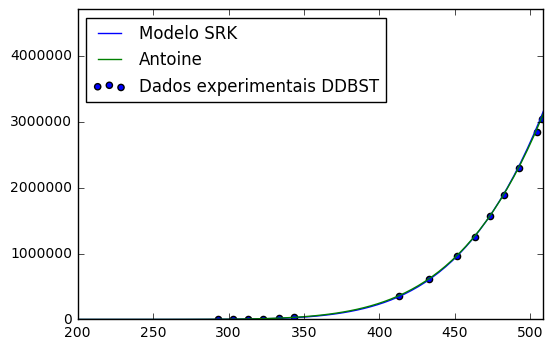

In [18]:
dadosexp = np.loadtxt('exp data vapor pressure water.txt', dtype='float', comments='#', converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
T_exp = dadosexp[:,0]
P_exp = dadosexp[:,1]*1000

plt.figure(1)

legend=[]
plt.title('Pressão de saturação, água (Escala log)')
plt.semilogy(1)
plt.scatter(T_exp,P_exp, label='Dados experimentais DDBST')
plt.plot(Taxis,Paxis, label='Modelo SRK')

plt.xlim([200,Tc_wat]) 
plt.ylim([1e3,1e9]) 
      
Pantoine_aguaaxis = [ Pantoine_agua(Taxis[i]) for i in range(100) ]
plt.plot(Taxis,Pantoine_aguaaxis, label='Antoine')
plt.legend(loc=0)


plt.figure(2)

legend=[]
plt.scatter(T_exp,P_exp, label='Dados experimentais DDBST')
plt.plot(Taxis,Paxis, label='Modelo SRK')

plt.xlim([200,Tc_ac]) 
plt.ylim([0,Pc_ac]) 
      
Pantoine_aguaaxis = [ Pantoine_agua(Taxis[i]) for i in range(100) ]
plt.plot(Taxis,Pantoine_aguaaxis, label='Antoine')
plt.legend(loc=0)

plt.show()

# Referências:
DDBST GmbH. Vapor Pressure of Acetone. Disponível em: <http://www.ddbst.com/en/EED/PCP/VAP_C4.php>. Acessado em: 28/11/2016.

DDBST GmbH. Vapor Pressure of Water. Disponível em: <http://www.ddbst.com/en/EED/PCP/VAP_C174.php>. Acessado em: 28/11/2016.

GESTIS Substance Database. Acetone. Disponível em: <http://gestis-en.itrust.de/nxt/gateway.dll/gestis_en/011230.xml?f=templates$fn=default.htm$3.0>. Acessado em: 26/11/2016.

NIST - National Institute of Standards and Technology. Acetone. Disponível em: <http://webbook.nist.gov/cgi/cbook.cgi?ID=C67641&Mask=4&Type=ANTOINE&Plot=on>. Acessado em: 26/11/2016.

NIST - National Institute of Standards and Technology. Water. Disponível em: <http://webbook.nist.gov/cgi/cbook.cgi?ID=C7732185&Mask=4&Type=ANTOINE&Plot=on>. Acessado em: 26/11/2016.

TAVARES, F.W.; MEDEIROS, F. de A.; S. I.S.V. Termodinâmica da Engenharia Química - EQE 359.

VAN NESS, H.C.; SMITH, J.M.; ABBOTT, M.M. Introdução à Termodinâmica da Engenharia Química. 7 Edição. Rio de Janeiro, LTC, 2007. 626 p.